In [17]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [50]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [51]:
len(words)

32033

In [52]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [53]:
#build the dataset
block_size = 3 # context length: how many charactesrs do we take to predict the next one?
X, Y = [], []
for w in words[:5]:
    
#     print(w)
    context = [0] * block_size
#     print('context', context)
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context),'--->', itos[ix])
        context =  context[1:] + [ix] #crop and append
    
X = torch.tensor(X)
Y = torch.tensor(Y)


In [54]:
# build the dataset

def build_dataset(words):  
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])                              
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [55]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [56]:
C = torch.randn((27,2))
C

tensor([[ 1.7259, -0.5763],
        [-0.4540, -0.2048],
        [-0.1235, -2.4210],
        [ 0.2396, -0.5797],
        [-0.2019,  1.1156],
        [-0.5444, -0.3678],
        [ 0.4410,  0.9303],
        [-0.4938,  0.5473],
        [ 0.5602, -0.5098],
        [-0.5890,  0.1834],
        [-0.3265, -0.0553],
        [-0.7864, -0.7662],
        [-0.5289,  0.6024],
        [ 2.7543,  0.5467],
        [-0.0973,  0.9956],
        [ 0.6760,  1.5489],
        [ 0.3170, -1.2830],
        [-0.2210, -1.2871],
        [-1.3897, -1.1577],
        [ 0.7625,  0.8811],
        [ 0.7837,  0.7624],
        [ 0.7936,  0.7512],
        [ 0.9545, -0.9962],
        [ 0.9688,  0.1189],
        [-0.0908,  0.6628],
        [-1.3276, -1.3997],
        [ 0.8911,  0.7004]])

In [57]:
F.one_hot(torch.tensor(5), num_classes=27 ).shape

torch.Size([27])

In [58]:
C[[1,2,3]]

tensor([[-0.4540, -0.2048],
        [-0.1235, -2.4210],
        [ 0.2396, -0.5797]])

In [59]:
print('C.shape',C.shape)
print('X.shape',X.shape)

C.shape torch.Size([27, 2])
X.shape torch.Size([32, 3])


In [60]:
F.one_hot(torch.tensor(5), num_classes=27 ).float() @ C

tensor([-0.5444, -0.3678])

In [61]:
X[13,2]

tensor(1)

In [63]:
C[1]

tensor([-0.4540, -0.2048])

In [64]:
C[X][13,2]

tensor([-0.4540, -0.2048])

In [69]:
C.shape
C[X].shape

torch.Size([32, 3, 2])

In [70]:
emb = C[X]
print(emb.shape)
emb.shape
# emb[:,0,:]
emb

torch.Size([32, 3, 2])


tensor([[[ 1.7259, -0.5763],
         [ 1.7259, -0.5763],
         [ 1.7259, -0.5763]],

        [[ 1.7259, -0.5763],
         [ 1.7259, -0.5763],
         [-0.5444, -0.3678]],

        [[ 1.7259, -0.5763],
         [-0.5444, -0.3678],
         [ 2.7543,  0.5467]],

        [[-0.5444, -0.3678],
         [ 2.7543,  0.5467],
         [ 2.7543,  0.5467]],

        [[ 2.7543,  0.5467],
         [ 2.7543,  0.5467],
         [-0.4540, -0.2048]],

        [[ 1.7259, -0.5763],
         [ 1.7259, -0.5763],
         [ 1.7259, -0.5763]],

        [[ 1.7259, -0.5763],
         [ 1.7259, -0.5763],
         [ 0.6760,  1.5489]],

        [[ 1.7259, -0.5763],
         [ 0.6760,  1.5489],
         [-0.5289,  0.6024]],

        [[ 0.6760,  1.5489],
         [-0.5289,  0.6024],
         [-0.5890,  0.1834]],

        [[-0.5289,  0.6024],
         [-0.5890,  0.1834],
         [ 0.9545, -0.9962]],

        [[-0.5890,  0.1834],
         [ 0.9545, -0.9962],
         [-0.5890,  0.1834]],

        [[ 0.9545, -0

In [33]:
W1 = torch.randn((6,100))
b1 = torch.rand(100)

In [34]:
emb.shape

torch.Size([228146, 3, 2])

In [35]:
W1.shape

torch.Size([6, 100])

In [38]:
emb.view(-1,6) @ W1 + b1

tensor([[-0.0875,  3.0502,  2.1069,  ..., -0.2714, -0.8751, -0.2000],
        [ 0.4728,  4.1806,  2.6994,  ...,  0.1849, -0.0332, -0.7976],
        [ 3.4865,  2.8138,  3.5670,  ...,  3.6383,  1.5245,  0.1645],
        ...,
        [-0.9702, -2.7871, -0.6910,  ..., -0.1974,  0.8669,  0.9619],
        [-0.0108, -1.2763,  0.3515,  ...,  1.1165,  0.2937, -0.9802],
        [-1.2130,  0.6079,  0.9836,  ...,  1.2230,  6.3536, -0.7786]])

In [39]:
emb[:,0,:].shape

torch.Size([228146, 2])

In [40]:
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

torch.Size([228146, 6])

In [41]:
emb.shape

torch.Size([228146, 3, 2])

In [42]:
len(torch.unbind(emb,2))

2

In [43]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [44]:
a = torch.arange(18)
a 

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [45]:
a.shape

torch.Size([18])

In [46]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [47]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [48]:
emb.shape

torch.Size([228146, 3, 2])

In [49]:
z = (emb.view(-1,6) @ W1 + b1) # setting that size to -1 python will  
                           #infer what size it should be if the second size is 6 
                           ##or u can use emb.shape[0]

In [50]:
h = torch.tanh(z)
h

tensor([[-0.0873,  0.9955,  0.9709,  ..., -0.2650, -0.7039, -0.1974],
        [ 0.4405,  0.9995,  0.9910,  ...,  0.1829, -0.0331, -0.6627],
        [ 0.9981,  0.9928,  0.9984,  ...,  0.9986,  0.9095,  0.1631],
        ...,
        [-0.7488, -0.9924, -0.5986,  ..., -0.1949,  0.6998,  0.7451],
        [-0.0108, -0.8555,  0.3377,  ...,  0.8063,  0.2855, -0.7531],
        [-0.8376,  0.5427,  0.7546,  ...,  0.8405,  1.0000, -0.6519]])

In [51]:
h.shape

torch.Size([228146, 100])

In [52]:
W2 = torch.randn((100, 27))
b2 = torch.rand(27)

In [53]:
logits = h @ W2 + b2

In [54]:
logits.shape

torch.Size([228146, 27])

In [55]:
counts = logits.exp()

In [56]:
prob = counts / counts.sum(1, keepdims=True)

In [57]:
prob.shape

torch.Size([228146, 27])

In [58]:
loss = -prob[torch.arange(32),Y[:32]].log().mean()
loss

tensor(13.9157)

In [59]:
logits = torch.tensor([-5, -3, 0, 100]) -100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [60]:

# ------------ final code for this lecture --------------- 


In [61]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [62]:
emb_dim = 14
nr_of_input_units = 3
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,emb_dim), generator=g)
W1 = torch.randn((emb_dim * nr_of_input_units,200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [63]:
sum(p.nelement() for p in parameters) #number of parameters in total

14405

In [64]:
for p in parameters:
    p.requires_grad = True

In [65]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [66]:
lri = []
lossi = []
stepi = []
minibatch_size = 64

In [67]:

for i in range(200000):

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0],(minibatch_size,))
    
    emb = C[Xtr[ix]] # (minibatch_size, 3, 2)
    h = torch.tanh(emb.view(-1, emb_dim * nr_of_input_units) @ W1 +b1) #(minibatch_size,100)
    logits = h @ W2 + b2 #(minibatch_size,27)
    loss = F.cross_entropy(logits, Ytr[ix])
#     print('loss',loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    lr = 0.1 if i < 100000  else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
#      lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
print('loss',loss.item())


loss 2.0996310710906982


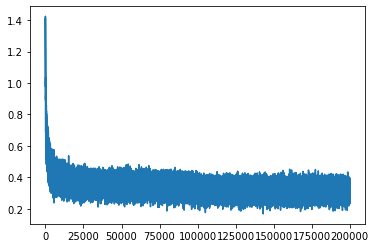

In [68]:
plt.plot(stepi, lossi)

In [69]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, emb_dim * nr_of_input_units) @ W1 +b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0885, grad_fn=<NllLossBackward0>)

In [70]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, emb_dim * nr_of_input_units) @ W1 +b1) #(32,100)
logits = h @ W2 + b2 #(32,27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1467, grad_fn=<NllLossBackward0>)

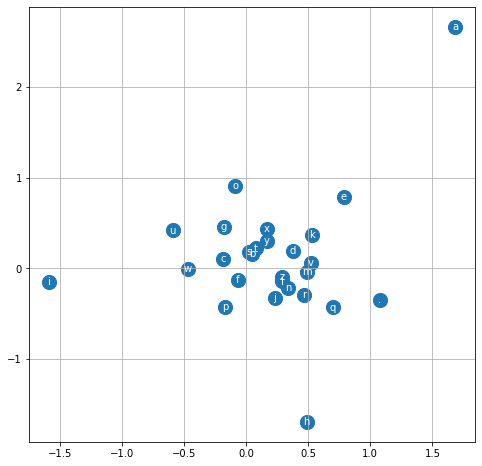

In [71]:
# see where letters are representedmbal7

plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')    

In [72]:
#training split, dev/validation split, test split
#80% , 10%, 10%

In [73]:
C[:,0]

tensor([ 1.0764,  1.6821,  0.0454, -0.1860,  0.3789,  0.7875, -0.0694, -0.1782,
         0.4871, -1.5850,  0.2302,  0.5319,  0.2908,  0.4880,  0.3386, -0.0872,
        -0.1712,  0.6961,  0.4694,  0.0268,  0.0781, -0.5926,  0.5212, -0.4674,
         0.1691,  0.1674,  0.2899], grad_fn=<SelectBackward0>)

In [74]:
C[:,1]

tensor([-0.3504,  2.6625,  0.1565,  0.1021,  0.1947,  0.7893, -0.1271,  0.4529,
        -1.6947, -0.1470, -0.3224,  0.3685, -0.1431, -0.0434, -0.2136,  0.9103,
        -0.4269, -0.4295, -0.2892,  0.1772,  0.2182,  0.4169,  0.0620, -0.0036,
         0.4336,  0.3021, -0.0917], grad_fn=<SelectBackward0>)

In [75]:
emb.view(1,-1).shape

torch.Size([1, 951510])

In [1]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
#       print('C',C)
#       print('context',context)
#       print('emb',emb)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
#       print(f'p: {probs.shape}')
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))


NameError: name 'torch' is not defined